In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy

In [122]:
def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [123]:
#import data
bkg = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/bkg.CSV")), delimiter =";")
std_ex_0degree_stretched = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ex_0degree_stretched.CSV")), delimiter =";")
std_ex_90degree = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ex_90degree.CSV")), delimiter =";")
std_ext_0deg = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std_ext_0deg.CSV")), delimiter =";")
std2_0degree_stretched2x = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/std2_0degree_stretched2x.CSV")), delimiter =";")
stdd2_90degree_2xstretched = np.genfromtxt((conv(x) for x in open("Aufgabe 2/csv/stdd2_90degree_2xstretched.CSV")), delimiter =";")

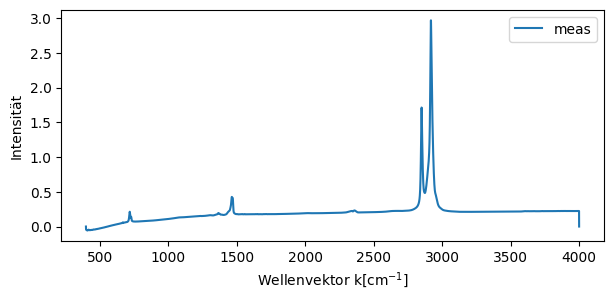

In [124]:
max_0deg_stre = np.max(std_ex_0degree_stretched[:,1])

plt.figure(figsize = [7,3])
plt.plot(std_ex_0degree_stretched[:,0],(std_ex_0degree_stretched[:,1]),label="meas")

plt.ylabel("Intensität")
plt.legend(loc = 0)
#plt.xlim(3980,4010)
plt.xlabel(r"Wellenvektor k$[\mathrm{cm}^{-1}]$")
plt.show()

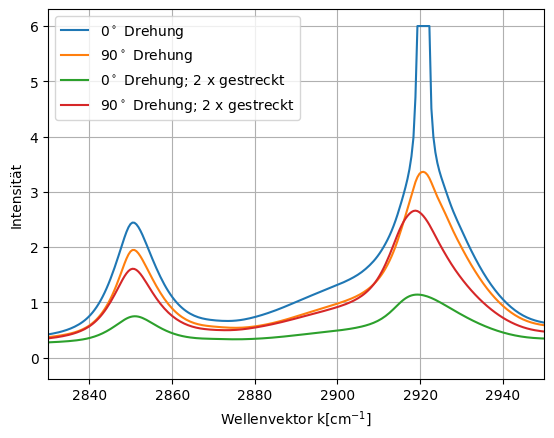

In [125]:
#plt.figure(figsize = [15,10])
plt.plot(std_ex_90degree[:,0],(std_ex_90degree[:,1]) ,label= r"0$^\circ$ Drehung")
plt.plot(std_ext_0deg[:,0],(std_ext_0deg[:,1]) ,label=r"$90^\circ$ Drehung")
plt.plot(std2_0degree_stretched2x[:,0],(std2_0degree_stretched2x[:,1]) ,label=r"0$^\circ$ Drehung; 2 x gestreckt")
plt.plot(stdd2_90degree_2xstretched[:,0],(stdd2_90degree_2xstretched[:,1]) ,label=r"$90^\circ$ Drehung; 2 x gestreckt")

plt.xlim((2830,2950))
plt.grid(True)
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("Intensität")
plt.legend(loc = 0)
plt.savefig("plots/Dichro_all_zoom.pdf")
plt.show()

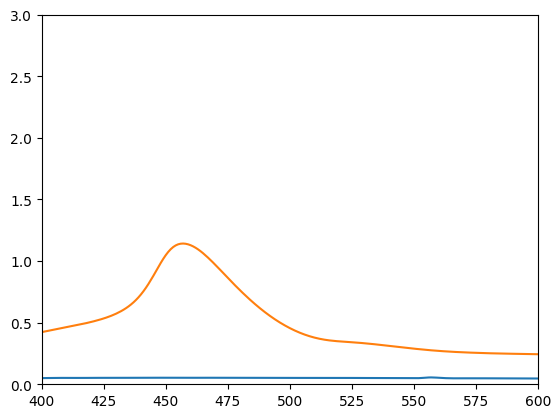

In [182]:
xax = np.arange(0,len(std_ex_90degree))
plt.plot(xax, std_ex_90degree[:,1])
plt.axis([400,600,0,3])

xax2 = np.arange(0,len(std2_0degree_stretched2x))
plt.plot(xax2, std2_0degree_stretched2x[:,1])

In [116]:
max1 = np.argmax(std_ex_90degree[5050:5150,1])
max2 = np.argmax(std_ext_0deg[5050:5150,1])
max3 = np.argmax(std2_0degree_stretched2x[400:600,1])
max4 = np.argmax(stdd2_90degree_2xstretched[400:600,1])


print(max1+5050,max2+5050)
print(max3+400,max4+400)
print(std2_0degree_stretched2x[457,1]-stdd2_90degree_2xstretched[456,1])
print(std_ex_90degree[5083,1]-std_ext_0deg[5083,1])

5083 5083
457 456
-1.518416
0.495406


0.2096445046613553
5.530447248539011 -5.686312733278258
[0.01422064 0.04845983 0.08058256] [0.01396572 0.05536936 0.09196904]


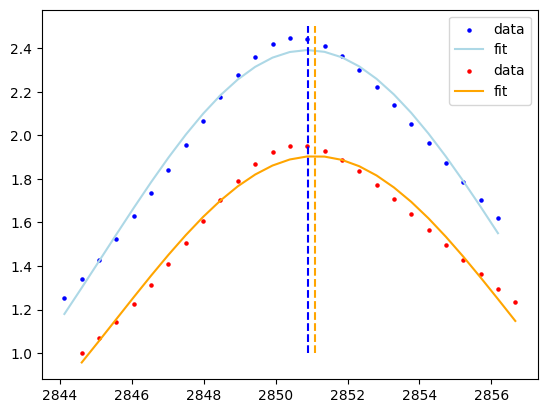

In [200]:
# Define the Gaussian function
# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(std_ex_90degree[5070:5096,0])
ydata = np.asarray(std_ex_90degree[5070:5096,1])

xdata1 = np.asarray(std_ext_0deg[5070:5096,0])
ydata1 = np.asarray(std_ext_0deg[5070:5096,1])
  
n = len(xdata)    
mean = 2850                     
#mean = sum(xdata*ydata)/n                   
sigma = sum(ydata*(xdata-mean)**2)/n

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,xdata,ydata,p0=[1,mean,sigma])
popt1,pcov1 = curve_fit(gaus,xdata1,ydata1, p0=[1,mean,sigma])

plt.scatter(xdata, ydata, label='data',s=5,c="blue")
plt.plot(xdata, gaus(xdata,*popt), '-', label='fit',c="lightblue")

plt.plot([popt[1],popt[1]],[1,2.5],"--",c="blue")
plt.plot([popt1[1],popt1[1]],[1,2.5],"--",c="orange")

plt.scatter(xdata1, ydata1, label='data',s=5,c="red")
plt.plot(xdata1, gaus(xdata1,*popt1), '-', label='fit',c="orange")

print(popt1[1]-popt[1])
print(popt1[2],popt[2])
print(np.sqrt(np.diag(pcov)),np.sqrt(np.diag(pcov1)))

plt.legend()
plt.savefig("gaussianfit.pdf")

1.0732673921334026
10.160627057258445 8.819628781304589
1.0732673921334026


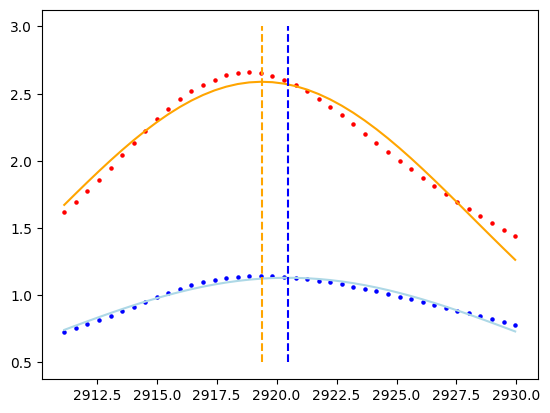

In [201]:
n = len(xdata)    
mean = 2920                     
#mean = sum(xdata*ydata)/n                   
#sigma = sum(ydata*(xdata-mean)**2)/n
sigma= 10

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

x1 = np.asarray(std2_0degree_stretched2x[440:480,0])
y1 = np.asarray(std2_0degree_stretched2x[440:480,1])

x2 = np.asarray(stdd2_90degree_2xstretched[440:480,0])
y2 = np.asarray(stdd2_90degree_2xstretched[440:480,1])



popt2,pcov2 = curve_fit(gaus,x1,y1,p0=[1,mean,sigma])
popt3,pcov3 = curve_fit(gaus,x2,y2,p0=[1,mean,sigma])


plt.scatter(x1, y1, label='data',s=5,c="blue")
plt.scatter(x2, y2, label='data',s=5,c="red")

plt.plot(x1, gaus(x1,*popt2), '-', label='fit',c="lightblue")
plt.plot(x2, gaus(x1,*popt3), '-', label='fit',c="orange")

plt.plot([popt2[1],popt2[1]],[0.5,3],"--",c="blue")
plt.plot([popt3[1],popt3[1]],[0.5,3],"--",c="orange")

print(popt2[1]-popt3[1])
print(popt2[2],popt3[2])
#print(np.sqrt(np.diag(pcov)),np.sqrt(np.diag(pcov1)))

print(popt2[1]-popt3[1])

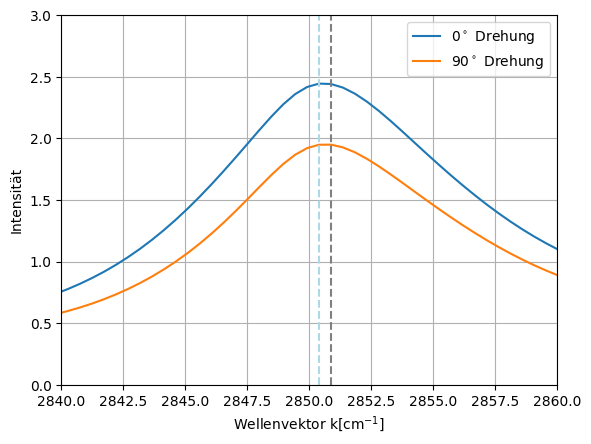

In [69]:
plt.plot(std_ex_90degree[:,0],(std_ex_90degree[:,1]) ,label= r"0$^\circ$ Drehung")
plt.plot(std_ext_0deg[:,0],(std_ext_0deg[:,1]) ,label=r"$90^\circ$ Drehung")

maxline = [std_ex_90degree[5083,0], std_ex_90degree[5083,0]]
maxline2 = [std_ext_0deg[5083,0],std_ext_0deg[5083,0]]

plt.plot(maxline,[0,3],"--", color="lightblue")
plt.plot(maxline2,[0,3],"--", color="grey")

plt.axis([2840,2860,0,3])
plt.grid(True)
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("Intensität")
plt.legend(loc = 0)
plt.savefig("plots/Dichro_all_zoom.pdf")
plt.show()

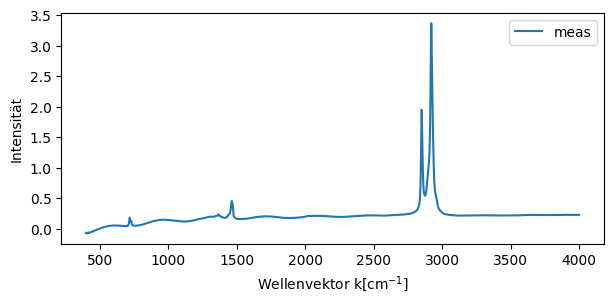

In [11]:
max_0deg_stre = np.max(std_ext_0deg[:,1])

plt.figure(figsize = [7,3])
plt.plot(std_ext_0deg[:,0],(std_ext_0deg[:,1]) ,label="meas")

plt.ylabel("Intensität")
plt.legend(loc = 0)
#plt.xlim(3980,4010)
plt.xlabel(r"Wellenvektor k$[\mathrm{cm}^{-1}]$")
plt.show()

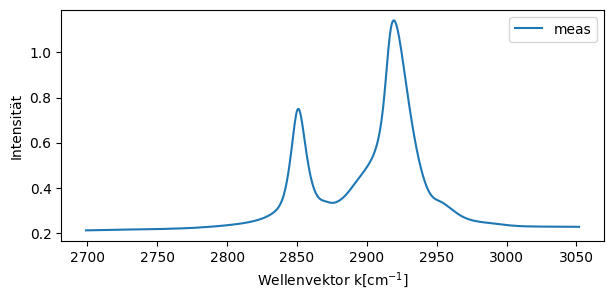

In [12]:
max_0deg_stre = np.max(std2_0degree_stretched2x[:,1])

plt.figure(figsize = [7,3])
plt.plot(std2_0degree_stretched2x[:,0],(std2_0degree_stretched2x[:,1]) ,label="meas")

plt.ylabel("Intensität")
plt.legend(loc = 0)
#plt.xlim(3980,4010)
plt.xlabel(r"Wellenvektor k$[\mathrm{cm}^{-1}]$")
plt.show()